In [133]:
# mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

In [134]:
import six

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-05-15 21:01:22	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-05-15 21:01:22	Parsing datapackage to create a Study object
2016-05-15 21:01:54	Initializing Study
2016-05-15 21:01:54	Initializing Predictor configuration manager for Study
2016-05-15 21:01:54	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-15 21:01:54	Added ExtraTreesClassifier to default predictors
2016-05-15 21:01:54	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-15 21:01:54	Added ExtraTreesRegressor to default predictors
2016-05-15 21:01:54	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-15 21:01:54	Added GradientBoostingClassifier to default predic

In [135]:
mkdir $folder

mkdir: cannot create directory `figures': File exists


In [136]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included
1,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included
2,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,iPSC,included
3,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included
4,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included


In [138]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,MN-MN
1,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,MN-NPC
2,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,iPSC,included,MN-iPSC
3,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,NPC-MN
4,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,NPC-NPC


In [139]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [140]:
modality_transitions_subset = modality_transitions.query('transition in @transitions_of_interest')
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,iPSC-MN
7,iPSC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,iPSC-NPC
15,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,MN,bimodal,iPSC-MN
16,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,NPC,bimodal,iPSC-NPC
24,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included,iPSC-MN


In [141]:
same_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] == x['modality_x']).sum())
same_modality.name = 'Same Modality'
changing_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] != x['modality_x']).sum())
changing_modality.name = 'Switching Modality'
changing_modality

transition
iPSC-MN     1067
iPSC-NPC    1724
Name: Switching Modality, dtype: int64

In [142]:
n_modality_changes = pd.concat([changing_modality, same_modality], axis=1).unstack()
n_modality_changes = n_modality_changes.reset_index()
n_modality_changes = n_modality_changes.rename(columns={'level_0': "Modality", 0:'# AS Exons'})
n_modality_changes['% AS Exons'] = 100 * n_modality_changes.groupby('transition')['# AS Exons'].apply(lambda x: x/x.sum())
n_modality_changes

,Modality,transition,# AS Exons,% AS Exons
0,Switching Modality,iPSC-MN,1067,21.572988
1,Switching Modality,iPSC-NPC,1724,21.652851
2,Same Modality,iPSC-MN,3879,78.427012
3,Same Modality,iPSC-NPC,6238,78.347149


In [143]:
percent_exons_change_modalities = n_modality_changes.set_index(['transition', 'Modality'])['% AS Exons']
percent_exons_change_modalities

transition  Modality          
iPSC-MN     Switching Modality    21.572988
iPSC-NPC    Switching Modality    21.652851
iPSC-MN     Same Modality         78.427012
iPSC-NPC    Same Modality         78.347149
Name: % AS Exons, dtype: float64

In [196]:
cumulative_sum = percent_exons_change_modalities.groupby(level='transition').cumsum()
cumulative_sum

transition  Modality          
iPSC-MN     Switching Modality     21.572988
iPSC-NPC    Switching Modality     21.652851
iPSC-MN     Same Modality         100.000000
iPSC-NPC    Same Modality         100.000000
Name: % AS Exons, dtype: float64

In [197]:
bottoms = cumulative_sum - percent_exons_change_modalities
bottoms

transition  Modality          
iPSC-MN     Switching Modality     0.000000
iPSC-NPC    Switching Modality     0.000000
iPSC-MN     Same Modality         21.572988
iPSC-NPC    Same Modality         21.652851
Name: % AS Exons, dtype: float64

### plot the percent of events that change or don't change modality

Same Modality


AttributeError: Unknown property linecolor

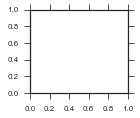

In [202]:
sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(1.75, 1.5))
palette = ['white', 'grey'] #sns.color_palette('Greys', n_colors=2)

for i, (delta_modality, s) in enumerate(percent_exons_change_modalities.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0])

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color, linecolor='#262626')
ax.set(xticks=x + 0.4, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/n_exons_change_modalities_barplot_stacked.pdf'.format(folder))


In [158]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,iPSC-MN
15,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,MN,bimodal,iPSC-MN
24,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included,iPSC-MN
33,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,included,iPSC-MN
42,iPSC,exon:chr10:102747070-102747240:-@exon:chr10:10...,included,MN,bimodal,iPSC-MN


In [159]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count.head()

modality_x  modality_y
bimodal     bimodal       353
            excluded      118
            included      196
excluded    bimodal       201
            excluded      942
dtype: int64

In [160]:
ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,bimodal,excluded,included,uncategorized
modality_x,,,,
bimodal,353,118,196,NaN
excluded,201,942,7,2
included,509,NaN,2584,NaN
middle,NaN,NaN,1,NaN
uncategorized,32,1,NaN,NaN


In [161]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,bimodal,excluded,included,uncategorized
iPSC,,,,
bimodal,353,118,196,NaN
excluded,201,942,7,2
included,509,NaN,2584,NaN
middle,NaN,NaN,1,NaN
uncategorized,32,1,NaN,NaN


In [162]:
from anchor import MODALITY_ORDER

In [163]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,942,201,7,NaN,2
bimodal,118,353,196,NaN,NaN
included,NaN,509,2584,NaN,NaN
middle,NaN,NaN,1,NaN,NaN
uncategorized,1,32,NaN,NaN,NaN


In [164]:
sns.set(style='ticks', context='paper')

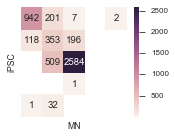

In [165]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_mn_modality_2d, annot=True, fmt='g')
ax.set(xticks=[], yticks=[])
# fig.axes[-1].yaxis.locator_params()
fig.tight_layout()
# fig.savefig('{}/ipsc_to_mn.pdf')

### Get percentages for comparison - use % of events in both

In [166]:
percentages = 100*ipsc_mn_modality_2d.divide(ipsc_mn_modality_2d.sum(axis=1), axis=0)
percentages

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,81.770833,17.447917,0.607639,NaN,0.173611
bimodal,17.691154,52.923538,29.385307,NaN,NaN
included,NaN,16.456515,83.543485,NaN,NaN
middle,NaN,NaN,100.000000,NaN,NaN
uncategorized,3.030303,96.969697,NaN,NaN,NaN


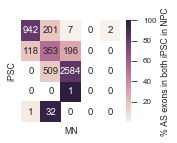

In [167]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, cbar_kws=dict(label='% AS exons in both iPSC in NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_mn_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_mn_modality_heatmap.pdf'.format(folder))

### iPSC-NPC $\Delta$ modality heatmap

In [168]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'NPC')
ipsc_npc_modalities = modality_transitions.loc[rows]
ipsc_npc_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
7,iPSC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,iPSC-NPC
16,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,NPC,bimodal,iPSC-NPC
25,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included,iPSC-NPC
34,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,NPC,included,iPSC-NPC
43,iPSC,exon:chr10:102747070-102747240:-@exon:chr10:10...,included,NPC,included,iPSC-NPC


In [169]:
ipsc_npc_modality_count = ipsc_npc_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_npc_modality_2d = ipsc_npc_modality_count.unstack()
ipsc_npc_modality_2d.index.name = 'iPSC'
ipsc_npc_modality_2d.columns.name = 'NPC'
ipsc_npc_modality_2d = ipsc_npc_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_npc_percentages = 100*ipsc_npc_modality_2d.divide(ipsc_npc_modality_2d.sum(axis=1), axis=0)
ipsc_npc_percentages

NPC,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,81.776240,18.166090,NaN,NaN,0.057670
bimodal,13.464141,58.525034,28.010825,NaN,NaN
included,NaN,16.178965,83.821035,NaN,NaN
middle,NaN,NaN,100.000000,NaN,NaN
uncategorized,6.060606,87.878788,NaN,NaN,6.060606


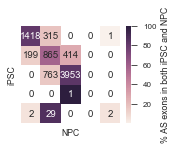

In [170]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_npc_percentages, cbar_kws=dict(label='% AS exons in both iPSC and NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_npc_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_npc_modality_heatmap.pdf'.format(folder))

## Statistical enrichment of motif changes

In [171]:
transitions = [(u'iPSC', u'NPC'), (u'iPSC', u'MN')]

In [172]:
hypergeom?

In [173]:
from scipy.stats import hypergeom

In [174]:
import itertools

lines = []

for phenotype1, phenotype2 in transitions:
    modality_subset = modality_transitions.query('(phenotype_x == @phenotype1) & (phenotype_y == @phenotype2)')
#     six.print_(phenotype1, phenotype2, modality_subset.shape)
    M = len(modality_subset['event_id'].unique())
    
    for modality1, modality2 in itertools.product(MODALITY_ORDER, repeat=2):
#         six.print_('\t', modality1, modality2)
        df1 = modality_subset.query('(phenotype_x == @phenotype1) & (modality_x == @modality1)')
        df2 = modality_subset.query('(phenotype_y == @phenotype2) & (modality_y == @modality2)')
        
        n = df1.shape[0]
        N = df2.shape[0]
        x = len(set(df1['event_id']) & set(df2['event_id']))
#         six.print_('\t\t', x, M, n, N)
        if x > 0:
            result = -hypergeom.logsf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype1, modality1, phenotype2, modality2, result])
enrichment = pd.DataFrame(lines, columns=['phenotype1', 'modality1', 'phenotype2', 'modality2', '$-\log_{10}(p)$'])
enrichment['$-\log_{10}(q)$'] = enrichment['$-\log_{10}(p)$'] - np.log10(enrichment.shape[0])
enrichment

,phenotype1,modality1,phenotype2,modality2,$-\log_{10}(p)$,$-\log_{10}(q)$
0,iPSC,excluded,NPC,excluded,2.317343e+03,2315.963100
1,iPSC,excluded,NPC,bimodal,-5.767831e-12,-1.380211
2,iPSC,excluded,NPC,uncategorized,2.107060e+00,0.726849
3,iPSC,bimodal,NPC,excluded,-9.949375e-12,-1.380211
4,iPSC,bimodal,NPC,bimodal,4.959418e+02,494.561624
5,iPSC,bimodal,NPC,included,-1.161471e-11,-1.380211
6,iPSC,included,NPC,bimodal,-7.010836e-12,-1.380211
7,iPSC,included,NPC,included,2.159698e+03,2158.317910
8,iPSC,middle,NPC,included,inf,inf
9,iPSC,uncategorized,NPC,excluded,2.427582e-02,-1.355935


In [175]:
enrichment_2d = enrichment.pivot_table(index=['phenotype1', 'modality1'], 
                                       columns=['phenotype2', 'modality2'], 
                                       values='$-\log_{10}(q)$')

In [176]:
columns = pd.MultiIndex.from_product([['NPC', 'MN'], MODALITY_ORDER])
index = pd.MultiIndex.from_product([['iPSC'], MODALITY_ORDER])

enrichment_2d = enrichment_2d.reindex(columns=columns, index=index)
enrichment_2d

NPC                                                \
                       excluded     bimodal     included middle uncategorized   
iPSC excluded       2315.963100   -1.380211          NaN    NaN      0.726849   
     bimodal          -1.380211  494.561624    -1.380211    NaN           NaN   
     included               NaN   -1.380211  2158.317910    NaN           NaN   
     middle                 NaN         NaN          inf    NaN           NaN   
     uncategorized    -1.355935   32.862310          NaN    NaN     15.170488   

                             MN                                                
                       excluded     bimodal     included middle uncategorized  
iPSC excluded       1501.248607   -1.380206    -1.380211    NaN           inf  
     bimodal          -1.374550  183.322731    -1.380211    NaN           NaN  
     included               NaN   -1.380211  1367.855499    NaN           NaN  
     middle                 NaN         NaN          inf    NaN           NaN  
     uncategorized    -1.376813   48.758054          NaN    NaN           NaN

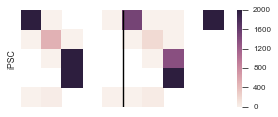

In [177]:
fig, ax = plt.subplots(figsize=(4, 1.75))
sns.heatmap(enrichment_2d, vmin=0, vmax=2000)

ymin, ymax = ax.get_ylim()
ax.vlines(5, ymin, ymax)
ax.set(xticks=[], yticks=[], ylabel='iPSC', xlabel='')
fig.tight_layout()

## Barplot of changes to/from bimodal

In [178]:
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,MN-MN
1,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,MN-NPC
2,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,iPSC,included,MN-iPSC
3,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,NPC-MN
4,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,NPC-NPC


In [179]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,MN-MN
1,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,MN-NPC
2,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,iPSC,included,MN-iPSC
3,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,MN,included,NPC-MN
4,NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,NPC,included,NPC-NPC


In [180]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [181]:
transition_rows = modality_transitions.transition.isin(transitions_of_interest)
delta_modality_rows = modality_transitions['modality_x'] != modality_transitions['modality_y']
modality_transitions_subset = modality_transitions.loc[transition_rows & delta_modality_rows]
modality_transitions_subset['transition'] = pd.Categorical(modality_transitions_subset['transition'], 
                                                           categories=transitions_of_interest, ordered=True)
modality_transitions_subset.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
15,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,MN,bimodal,iPSC-MN
16,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included,NPC,bimodal,iPSC-NPC
42,iPSC,exon:chr10:102747070-102747240:-@exon:chr10:10...,included,MN,bimodal,iPSC-MN
47,iPSC,exon:chr10:103113820-103113985:+@exon:chr10:10...,bimodal,MN,included,iPSC-MN
59,iPSC,exon:chr10:103190102-103190209:+@exon:chr10:10...,bimodal,MN,included,iPSC-MN


In [182]:
delta_modalities = modality_transitions_subset.groupby(['transition', 'modality_x', 'modality_y']).size()
delta_modalities = delta_modalities.reset_index()
delta_modalities = delta_modalities.rename(columns={0: '# AS Exons'})
delta_modalities

,transition,modality_x,modality_y,# AS Exons
0,iPSC-NPC,bimodal,excluded,199
1,iPSC-NPC,bimodal,included,414
2,iPSC-NPC,excluded,bimodal,315
3,iPSC-NPC,excluded,uncategorized,1
4,iPSC-NPC,included,bimodal,763
5,iPSC-NPC,middle,included,1
6,iPSC-NPC,uncategorized,bimodal,29
7,iPSC-NPC,uncategorized,excluded,2
8,iPSC-MN,bimodal,excluded,118
9,iPSC-MN,bimodal,included,196


In [183]:
col = '$\Delta$ Modality'

# Label everythign as "Other" first
delta_modalities[col] = 'Other'

# From bimodal
delta_modalities.loc[delta_modalities['modality_x'] == 'bimodal', col] = 'Bimodal --> X'

# To Bimodal
delta_modalities.loc[delta_modalities['modality_y'] == 'bimodal', col] = 'X --> Bimodal'
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality
0,iPSC-NPC,bimodal,excluded,199,Bimodal --> X
1,iPSC-NPC,bimodal,included,414,Bimodal --> X
2,iPSC-NPC,excluded,bimodal,315,X --> Bimodal
3,iPSC-NPC,excluded,uncategorized,1,Other
4,iPSC-NPC,included,bimodal,763,X --> Bimodal
5,iPSC-NPC,middle,included,1,Other
6,iPSC-NPC,uncategorized,bimodal,29,X --> Bimodal
7,iPSC-NPC,uncategorized,excluded,2,Other
8,iPSC-MN,bimodal,excluded,118,Bimodal --> X
9,iPSC-MN,bimodal,included,196,Bimodal --> X


In [184]:
delta_modalities['% Changing AS Exons'] = delta_modalities.groupby('transition')['# AS Exons'].apply(lambda x: 100*x/x.sum())
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,199,Bimodal --> X,11.542923
1,iPSC-NPC,bimodal,included,414,Bimodal --> X,24.013921
2,iPSC-NPC,excluded,bimodal,315,X --> Bimodal,18.271462
3,iPSC-NPC,excluded,uncategorized,1,Other,0.058005
4,iPSC-NPC,included,bimodal,763,X --> Bimodal,44.257541
5,iPSC-NPC,middle,included,1,Other,0.058005
6,iPSC-NPC,uncategorized,bimodal,29,X --> Bimodal,1.682135
7,iPSC-NPC,uncategorized,excluded,2,Other,0.116009
8,iPSC-MN,bimodal,excluded,118,Bimodal --> X,11.059044
9,iPSC-MN,bimodal,included,196,Bimodal --> X,18.369260


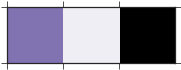

In [185]:
palette = sns.light_palette(MODALITY_TO_COLOR['bimodal'], n_colors=2, reverse=True) + ['k']
sns.palplot(palette)

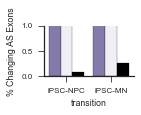

In [186]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(x='transition', y='% Changing AS Exons', palette=palette,
            hue=col, data=delta_modalities, ci=None, order=transitions_of_interest)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% Changing AS Exons')

sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
ax.legend_.set_visible(False)
fig.savefig('{}/changing_modalities_barplot_zoom.pdf'.format(folder))

### Stacked bar plot

In [187]:
delta_modalities['$\Delta$ Modality'] = pd.Categorical(delta_modalities['$\Delta$ Modality'], 
                                                       categories=[ 'X --> Bimodal', 'Bimodal --> X', 'Other'], ordered=True)
# delta_modalities['transition'] = pd.Categorical(delta_modalities['transition'], 
#                                                        categories=transitions_of_interest, ordered=True)
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,199,Bimodal --> X,11.542923
1,iPSC-NPC,bimodal,included,414,Bimodal --> X,24.013921
2,iPSC-NPC,excluded,bimodal,315,X --> Bimodal,18.271462
3,iPSC-NPC,excluded,uncategorized,1,Other,0.058005
4,iPSC-NPC,included,bimodal,763,X --> Bimodal,44.257541
5,iPSC-NPC,middle,included,1,Other,0.058005
6,iPSC-NPC,uncategorized,bimodal,29,X --> Bimodal,1.682135
7,iPSC-NPC,uncategorized,excluded,2,Other,0.116009
8,iPSC-MN,bimodal,excluded,118,Bimodal --> X,11.059044
9,iPSC-MN,bimodal,included,196,Bimodal --> X,18.369260


In [188]:
changing_as_exons = delta_modalities.groupby(['transition', col])['% Changing AS Exons'].sum()
changing_as_exons

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal        64.211137
            Bimodal --> X        35.556845
            Other                 0.232019
iPSC-MN     X --> Bimodal        69.540769
            Bimodal --> X        29.428304
            Other                 1.030928
Name: % Changing AS Exons, dtype: float64

In [189]:
cumulative_sum = changing_as_exons.groupby(level=0).cumsum()
cumulative_sum

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         64.211137
            Bimodal --> X         99.767981
            Other                100.000000
iPSC-MN     X --> Bimodal         69.540769
            Bimodal --> X         98.969072
            Other                100.000000
Name: % Changing AS Exons, dtype: float64

In [190]:
bottoms = cumulative_sum - changing_as_exons
bottoms

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         0.000000
            Bimodal --> X        64.211137
            Other                99.767981
iPSC-MN     X --> Bimodal         0.000000
            Bimodal --> X        69.540769
            Other                98.969072
Name: % Changing AS Exons, dtype: float64

In [191]:
bottoms.index.levels[0]

CategoricalIndex([u'iPSC-NPC', u'iPSC-MN'], categories=[u'iPSC-NPC', u'iPSC-MN'], ordered=True, name=u'transition', dtype='category')

In [192]:
idx = pd.IndexSlice

X --> Bimodal
Bimodal --> X
Other


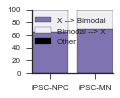

In [194]:
fig, ax = plt.subplots(figsize=(1.75, 1.5))


for i, (delta_modality, s) in enumerate(changing_as_exons.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0])

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color)
ax.set(xticks=x + 0.4, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_bimodal_barplot_stacked.pdf'.format(folder))
